Dieses Notebook liefert die Geodaten zur Anfrage vom Amt für Städtebau der Stadtverwaltung Winterthur vom 02.09.2024. Es geht darum, alle Gebäude der Stadt Winterthur aus dem OSM-Datensatz zu beziehen, die in den Pünten-Gebieten liegen. Die Pünten-Gebiete wurden als Polygone vom Amt für Städtebau geliefert. Eine genaue Beschreibung der Anfrage findet sich im Ticket [FSTGSM-213].

Bibliotheken importieren:

In [1]:
import os
import osmnx
import geopandas
import matplotlib

Die Pünten-Gebiete als Anfrage-Polygone (anfrage_polygone_gdf) laden und erste Zeilen des GeoDataFrames (GDF) anzeigen:

In [2]:
anfrage_polygone_gdf = geopandas.read_file("input/AV_Strassenblockplan_familiengaerten.shx")
anfrage_polygone_gdf.head()


,fid_,id_art,art_name,geometry
0,0,6,Familiengärten,"POLYGON ((2696142.681 1263324.303, 2696139.152..."
1,0,6,Familiengärten,"POLYGON ((2695436.882 1262573.750, 2695424.465..."
2,0,6,Familiengärten,"POLYGON ((2695318.615 1262411.404, 2695408.831..."
3,0,6,Familiengärten,"POLYGON ((2695801.364 1262083.289, 2695819.857..."
4,0,6,Familiengärten,"POLYGON ((2694267.954 1263971.263, 2694273.038..."


Koordinaten der Anfrage-Polygone vom Schweizer KBS "LV95" auf das internationale KBS "WGS84" umprojizieren. Dies ist notwendig, da die OSM-Daten, die bezogen werden sollen, in WGS84 vorliegen.

In [3]:
anfrage_polygone_gdf = geopandas.GeoDataFrame(anfrage_polygone_gdf, crs=2056)
anfrage_polygone_gdf = anfrage_polygone_gdf.to_crs(epsg=4326)
anfrage_polygone_gdf.head()

,fid_,id_art,art_name,geometry
0,0,6,Familiengärten,"POLYGON ((8.71499 47.51363, 8.71495 47.51358, ..."
1,0,6,Familiengärten,"POLYGON ((8.70547 47.50698, 8.70530 47.50701, ..."
2,0,6,Familiengärten,"POLYGON ((8.70386 47.50554, 8.70505 47.50517, ..."
3,0,6,Familiengärten,"POLYGON ((8.71020 47.50252, 8.71044 47.50260, ..."
4,0,6,Familiengärten,"POLYGON ((8.69025 47.51972, 8.69036 47.52164, ..."


Prüfung, ob alle Geometrien der Anfrage-Polygone valide sind:

In [4]:
all(anfrage_polygone_gdf.is_valid)

True

Kartenvorschau der Pünten-Gebiete (Anfrage-Polygone) anzeigen:

<Axes: >

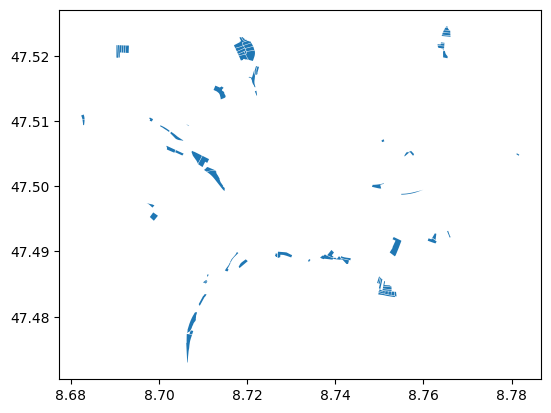

In [5]:
anfrage_polygone_gdf.plot()

Alle Gebäude-Geoobjekte der Stadt Winterthur aus OSM laden und erste Spalten der GeoDataFrame (GDF) anzeigen. Hierbei sollen gleich nur die Gebäude innerhalb der Anfrage-Polygone von OSM geladen werden. Leider funktioniert der Datenabruf auf diese weise nicht, die Funktion wirft immer einen Fehler, demnach die Eingabe-Geometrien nicht valide sind. Die vorgängige Validitätsprüfung (siehe weiter oben) besagt jedoch, dass die Eingabe-Polygone valide sind. Tatsächliche Ursache des Fehlers bleibt unklar, weshalb der Code auskommentiert ist, bis eine Lösung gefunden wird. Im der Folge-Zelle wird stattdessen ein alternativer Datenbezug durchgeführt, bei dem (ineffizient) zunächst alle Winterthurer Gebäude aus OSM bezogen und anschliessend erst gefiltert werden.

In [6]:
# funktioniert leider nicht, wirft immer einen Fehler, wäre aber besser: winti_buildings_gdf = osmnx.features_from_polygon(polygon=anfrage_polygone_gdf, tags={"building": True})
# winti_buildings_gdf.head()

Alle Gebäude-Geoobjekte der Stadt Winterthur aus OSM laden und erste Spalten der GeoDataFrame (GDF) anzeigen:

In [7]:
winti_buildings_gdf = osmnx.features_from_place("Winterthur, Switzerland", {"building": True})
winti_buildings_gdf.head()

access amenity parking                  geometry  \
element_type osmid                                                          
node         1116372862     NaN     NaN     NaN  POINT (8.75910 47.52519)   
             3094709495     NaN     NaN     NaN  POINT (8.73029 47.49697)   
             10054090646    NaN     NaN     NaN  POINT (8.75554 47.50395)   
             10054090649    NaN     NaN     NaN  POINT (8.75383 47.50574)   
             10054090650    NaN     NaN     NaN  POINT (8.75342 47.50574)   

                         tourism  fee highway check_date man_made height  ...  \
element_type osmid                                                        ...   
node         1116372862      NaN  NaN     NaN        NaN      NaN    NaN  ...   
             3094709495      NaN  NaN     NaN        NaN      NaN    NaN  ...   
             10054090646     NaN  NaN     NaN        NaN      NaN    NaN  ...   
             10054090649     NaN  NaN     NaN        NaN      NaN    NaN  ...   
             10054090650     NaN  NaN     NaN        NaN      NaN    NaN  ...   

                         parcel_pickup supervised cemetery telecom lockable  \
element_type osmid                                                            
node         1116372862            NaN        NaN      NaN     NaN      NaN   
             3094709495            NaN        NaN      NaN     NaN      NaN   
             10054090646           NaN        NaN      NaN     NaN      NaN   
             10054090649           NaN        NaN      NaN     NaN      NaN   
             10054090650           NaN        NaN      NaN     NaN      NaN   

                         architect architect:wikidata usage industrial ways  
element_type osmid                                                           
node         1116372862        NaN                NaN   NaN        NaN  NaN  
             3094709495        NaN                NaN   NaN        NaN  NaN  
             10054090646       NaN                NaN   NaN        NaN  NaN  
             10054090649       NaN                NaN   NaN        NaN  NaN  
             10054090650       NaN                NaN   NaN        NaN  NaN  

[5 rows x 262 columns]

Es werden im Folgenden nur die Polygon-Objekte (Gebäude mit Grundrissen) aus dem OSM-Gebäude-Datensatz benötigt, daher auf Geometrietyp "Polygon" filtern:

In [8]:
winti_buildings_gdf = winti_buildings_gdf[winti_buildings_gdf.geometry.type == 'Polygon']
winti_buildings_gdf.head()

access          amenity parking  \
element_type osmid                                     
way          5058413    NaN  public_building     NaN   
             9264543    NaN         townhall     NaN   
             9347287    NaN              NaN     NaN   
             9347294    NaN              NaN     NaN   
             9347295    NaN           school     NaN   

                                                               geometry  \
element_type osmid                                                        
way          5058413  POLYGON ((8.74162 47.49566, 8.74154 47.49562, ...   
             9264543  POLYGON ((8.73111 47.50115, 8.73112 47.50085, ...   
             9347287  POLYGON ((8.73583 47.50538, 8.73564 47.50507, ...   
             9347294  POLYGON ((8.73773 47.50479, 8.73759 47.50458, ...   
             9347295  POLYGON ((8.73860 47.50458, 8.73850 47.50442, ...   

                     tourism  fee highway check_date man_made height  ...  \
element_type osmid                                                    ...   
way          5058413     NaN  NaN     NaN        NaN      NaN    NaN  ...   
             9264543     NaN  NaN     NaN        NaN      NaN    NaN  ...   
             9347287     NaN  NaN     NaN        NaN      NaN    NaN  ...   
             9347294     NaN  NaN     NaN        NaN      NaN    NaN  ...   
             9347295     NaN  NaN     NaN        NaN      NaN    NaN  ...   

                     parcel_pickup supervised cemetery telecom lockable  \
element_type osmid                                                        
way          5058413           NaN        NaN      NaN     NaN      NaN   
             9264543           NaN        NaN      NaN     NaN      NaN   
             9347287           NaN        NaN      NaN     NaN      NaN   
             9347294           NaN        NaN      NaN     NaN      NaN   
             9347295           NaN        NaN      NaN     NaN      NaN   

                     architect architect:wikidata usage industrial ways  
element_type osmid                                                       
way          5058413       NaN                NaN   NaN        NaN  NaN  
             9264543       NaN                NaN   NaN        NaN  NaN  
             9347287       NaN                NaN   NaN        NaN  NaN  
             9347294       NaN                NaN   NaN        NaN  NaN  
             9347295       NaN                NaN   NaN        NaN  NaN  

[5 rows x 262 columns]

Kartenvorschau der Gebäude-Polygon-Objekte aus der OSM-Datenquelle anzeigen:

<Axes: >

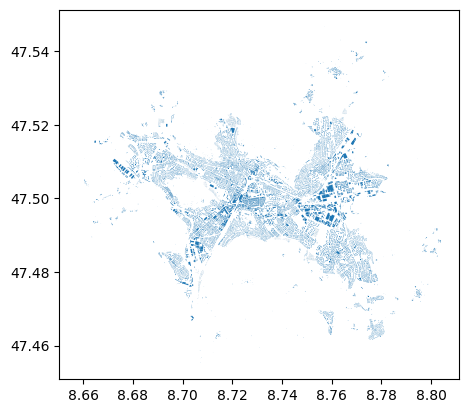

In [9]:
winti_buildings_gdf.plot()

Geodaten verschneiden, Index zurücksetzen (damit Zählung des Index wieder "sauber" bei 0 beginnt) und alle Spalten entfernen, bis auf die "geometry"-Spalte:

In [10]:
result = geopandas.sjoin(winti_buildings_gdf, anfrage_polygone_gdf, how="inner", op="intersects")
result = result.reset_index()
result = result[['geometry']]
result.head()

c:\Users\bued1.RP3V00E010\source\vscode\geospatial_data_analysis_py_public\Amt für Städtebau\Gebäude_in_Pünten_als_SHP\venv\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,geometry
0,"POLYGON ((8.72073 47.51657, 8.72089 47.51631, ..."
1,"POLYGON ((8.71952 47.52061, 8.71974 47.52063, ..."
2,"POLYGON ((8.70680 47.50925, 8.70698 47.50920, ..."
3,"POLYGON ((8.71099 47.48627, 8.71101 47.48627, ..."
4,"POLYGON ((8.71112 47.48650, 8.71116 47.48649, ..."


Resultat des Verschnitts visualisieren:

<Axes: >

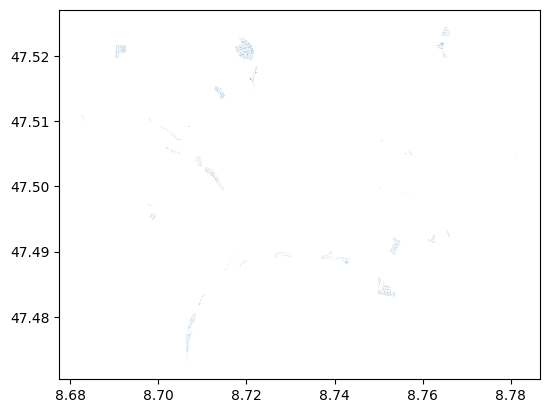

In [11]:
result.plot()

Für den Export des Resultats soll ein Unterordner "temp" verwendet werden. Falls dieser noch nicht besteht, soll er angelegt werden:

In [12]:
temp_folder = "temp"
if not os.path.exists(temp_folder):
    os.makedirs(temp_folder)

In ein Shapefile exportieren:

In [13]:
result.to_file("temp/puenten_buildings.shp")